Exploratory Data Analysis on Murder Rates by states

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import wquantiles
import statistics as st
import seaborn as sns

In [2]:
data = pd.read_csv('state.csv')
data.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


Checking for duplicates and null values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [4]:
data.isna().sum()

State           0
Population      0
Murder.Rate     0
Abbreviation    0
dtype: int64

In [5]:
data.duplicated(keep = 'first').sum()

0

In [6]:
data.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


Estimate of Location

Mean

In [7]:
data['Population'].mean()

6162876.3

Trimmed Mean from scipy.stats module

In [8]:
stats.trim_mean(data[['Population']], 0.1)

array([4783697.125])

Median

In [9]:
np.median(data[['Population']])

4436369.5

Weighted Mean and Weighted Median

In [10]:
Wmean = np.average(data['Murder.Rate'], weights = data['Population'])
Wmedian = wquantiles.median(data['Murder.Rate'], weights = data['Population'])
print('Weighted Mean: ', Wmean)
print('Weighted Median: ', Wmedian)

Weighted Mean:  4.445833981123393
Weighted Median:  4.4


Estimates of Variability

Deviation

In [11]:
loc_population = stats.trim_mean(data[['Population']], 0.1)
deviated_population = []
for i in range(len(data.Population)):
    deviated_population.append(data['Population'][i] - loc_population)
print('Location: ', loc_population)
deviated_population[:10]  

Location:  [4783697.125]


[array([-3961.125]),
 array([-4073466.125]),
 array([1608319.875]),
 array([-1867779.125]),
 array([32470258.875]),
 array([245498.875]),
 array([-1209600.125]),
 array([-3885763.125]),
 array([14017612.875]),
 array([4903955.875])]

In [12]:
loc_mdR = stats.trim_mean(data[['Murder.Rate']], 0.1)
dev_mdR = []
for i in range(len(data['Murder.Rate'])):
    dev_mdR.append(np.round(data["Murder.Rate"][i]-loc_mdR, 2))
print('Location: ', np.round(loc_mdR, 2))
dev_mdR[:10]

Location:  [3.94]


[array([1.76]),
 array([1.65]),
 array([0.75]),
 array([1.65]),
 array([0.46]),
 array([-1.15]),
 array([-1.55]),
 array([1.85]),
 array([1.85]),
 array([1.76])]

Variance

In [13]:
var_pop = np.var(data['Population'])
var_pop

45960360825926.56

In [14]:
var_mdR = np.var(data['Murder.Rate'])
np.round(var_mdR, 2)

3.6

Standard Deviation

In [15]:
std_pop = np.std(data['Population'])
print('Standard deviation of population: ', np.round(std_pop, 2))

Standard deviation of population:  6779407.11


In [16]:
std_mdR = np.std(data['Murder.Rate'])
print('Standard deviation of murder rate: ', np.round(std_mdR, 2))

Standard deviation of murder rate:  1.9


Mean Absolute Deviation

In [17]:
mad_pop = data['Population'].mad()
np.round(mad_pop, 2)

4450933.36

In [18]:
mad_mdR = data['Murder.Rate'].mad()
np.round(mad_mdR, 2)

1.55

Median Absolute Deviation

In [19]:
def mad(l):
    ml = []
    med = st.median(l)
    for i in l:
        ml.append(abs(i-med))
    return st.median(ml)

MAD_pop = mad(data['Population'])
MAD_pop

2596702.0

In [20]:
MAD_mdR = mad(data['Murder.Rate'])
np.round(MAD_mdR, 2)

1.6

Range

In [21]:
ran_pop = max(data['Population']) - min(data['Population'])
ran_pop

36690330

Quartiles and InterQuartile Range

In [22]:
from statistics import median
size = len(data['Population'])
nums = sorted(data['Population'])

q2 = median(nums)
if len(nums) % 2 == 1:
    q1 = median(nums[:size//2])
    q3 = median(nums[(size//2)+1:])
else:
    q1 = median(nums[:(size//2) + 1])
    q3 = median(nums[size//2:])
    
print('Q1: ', q1)
print('Q2: ', q2)
print('Q3: ', q3)
print('IQR: ', q3 - q1)

Q1:  1839667.5
Q2:  4436369.5
Q3:  6724540
IQR:  4884872.5


In [23]:
size1 = len(data['Murder.Rate'])
nums1 = sorted(data['Murder.Rate'])

q2 = median(nums1)
if len(nums1) % 2 == 1:
    q1 = median(nums1[:size1//2])
    q3 = median(nums1[(size1//2) + 1:])
else:
    q1 = median(nums1[:(size1//2) + 1])
    q3 = median(nums1[size1//2:])
    
print('Q1: ', q1)
print('Q2: ', q2)
print('Q3: ', q3)
print('IQR: ', np.round(q3 - q1, 2))

Q1:  2.45
Q2:  4.0
Q3:  5.6
IQR:  3.15


Percentiles and BoxPlot

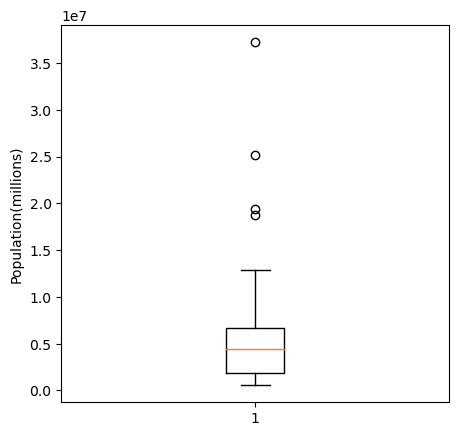

In [24]:
plt.figure(figsize = (5, 5), dpi = 100)
plt.boxplot(data['Population'])
plt.ylabel('Population(millions)')
plt.show()

Frequency tables and histograms

Frequency Table

In [25]:
interval = pd.cut(data['Population'], 10)
data['Interval'] = interval
data.head()

,State,Population,Murder.Rate,Abbreviation,Interval
0,Alabama,4779736,5.7,AL,"(4232659.0, 7901692.0]"
1,Alaska,710231,5.6,AK,"(526935.67, 4232659.0]"
2,Arizona,6392017,4.7,AZ,"(4232659.0, 7901692.0]"
3,Arkansas,2915918,5.6,AR,"(526935.67, 4232659.0]"
4,California,37253956,4.4,CA,"(33584923.0, 37253956.0]"


In [26]:
nOfStates = data['Interval'].value_counts()

ranges = np.array(nOfStates.index.values)
cnt = np.array(nOfStates.values)

intervalStates = {}
for i in ranges:
    intervalStates[i] = []
for i in range(50):
    intervalStates[data.iloc[i, 4]].append(data.iloc[i, 3])
    
intervalStates = list(intervalStates.values())
intervalStates = [','.join(l) for l in intervalStates]

In [27]:
popFreq = pd.DataFrame({'Ranges': ranges, 'Count': cnt, 'States': intervalStates}).sort_values('Ranges').set_index(np.arange(1, 11))
popFreq

,Ranges,Count,States
1,"(526935.67, 4232659.0]",24,"AK,AR,CT,DE,HI,ID,IA,KS,ME,MS,MT,NE,NV,NH,NM,N..."
2,"(4232659.0, 7901692.0]",14,"AL,AZ,CO,IN,KY,LA,MD,MA,MN,MO,SC,TN,WA,WI"
3,"(7901692.0, 11570725.0]",6,"GA,MI,NJ,NC,OH,VA"
4,"(11570725.0, 15239758.0]",2,"IL,PA"
5,"(15239758.0, 18908791.0]",1,FL
6,"(18908791.0, 22577824.0]",1,NY
7,"(22577824.0, 26246857.0]",1,TX
8,"(26246857.0, 29915890.0]",0,
9,"(29915890.0, 33584923.0]",0,
10,"(33584923.0, 37253956.0]",1,CA


Histogram

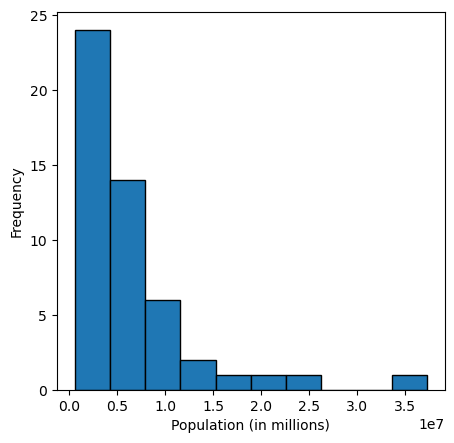

In [28]:
plt.figure(figsize = (5, 5), dpi = 100)
plt.hist(data['Population'], edgecolor = 'black')
plt.xlabel('Population (in millions)')
plt.ylabel('Frequency')
plt.show()

Density Estimates

C:\Users\rajat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


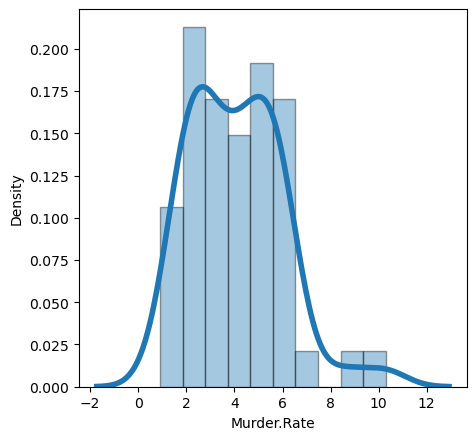

In [30]:
plt.figure(figsize = (5, 5), dpi = 100)
sns.distplot(data['Murder.Rate'], hist = True, kde = True, bins = 10, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.ylabel('Density')
plt.show()